In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle
from collections import Counter

In [2]:
# loading in the dataframe
file_path = '../data/final_full_dataset.pkl'
data = pickle.load(open(file_path, 'rb'))
data.head()

,num_weeks,duration_ms,explicit,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,...,genre_uk pop,genre_underground hip hop,genre_urban contemporary,genre_vapor trap,genre_viral pop,genre_viral trap,genre_vocal jazz,genre_west coast rap,genre_west coast trap,genre_yacht rock
0,12,255560.0,True,72.0,0.1180,0.796,0.500,0.000000,1,0.155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,210200.0,True,76.0,0.0317,0.822,0.505,0.000911,7,0.114,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,234666.0,True,61.0,0.7380,0.781,0.810,0.000000,10,0.144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,222706.0,True,65.0,0.2740,0.836,0.776,0.000000,4,0.113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,225893.0,True,75.0,0.2470,0.888,0.515,0.000000,1,0.446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 0 to 821
Columns: 691 entries, num_weeks to genre_yacht rock
dtypes: bool(1), float64(248), int64(7), uint8(435)
memory usage: 1.9 MB


In [5]:
data.corr()['num_weeks'].sort_values(ascending=False).dropna()

num_weeks                      1.000000
popularity                     0.397679
genre_old school dancehall     0.161600
artist_Imagine Dragons         0.160162
valence                        0.156923
genre_francoton                0.147550
loudness                       0.140227
genre_panamanian pop           0.139208
artist_Bruno Mars              0.128492
artist_Portugal. The Man       0.122963
genre_filter house             0.116842
genre_electro                  0.116842
artist_Dua Lipa                0.107379
artist_Zacari                  0.105400
artist_Coldplay                0.105400
artist_James Arthur            0.101888
genre_electronic               0.091543
artist_Daddy Yankee            0.089383
artist_Charlie Puth            0.089383
energy                         0.089094
artist_2017 Dynamo Hitz        0.087838
artist_Justin Bieber           0.086664
artist_Luis Fonsi              0.085322
artist_Halsey                  0.080611
artist_Alessia Cara            0.076296


(array([ 10.,   2.,   3.,   5.,   2.,  26., 157., 299., 246.,  72.]),
 array([ 0. ,  9.3, 18.6, 27.9, 37.2, 46.5, 55.8, 65.1, 74.4, 83.7, 93. ]),
 <a list of 10 Patch objects>)

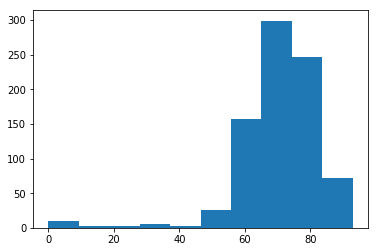

In [9]:
# plt.hist(data.num_weeks)
plt.hist(data.popularity)

In [11]:
# based on what i read about the popularity for the track, i have to drop it because it's time sensitive

data.drop(['popularity', 'offset_seconds', 'window_seconds'], axis=1, inplace=True, errors='ignore')
data.corr()['num_weeks'].sort_values(ascending=False).dropna()

num_weeks                      1.000000
genre_old school dancehall     0.161600
artist_Imagine Dragons         0.160162
valence                        0.156923
genre_francoton                0.147550
loudness                       0.140227
genre_panamanian pop           0.139208
artist_Bruno Mars              0.128492
artist_Portugal. The Man       0.122963
genre_filter house             0.116842
genre_electro                  0.116842
artist_Dua Lipa                0.107379
artist_Zacari                  0.105400
artist_Coldplay                0.105400
artist_James Arthur            0.101888
genre_electronic               0.091543
artist_Daddy Yankee            0.089383
artist_Charlie Puth            0.089383
energy                         0.089094
artist_2017 Dynamo Hitz        0.087838
artist_Justin Bieber           0.086664
artist_Luis Fonsi              0.085322
artist_Halsey                  0.080611
artist_Alessia Cara            0.076296
artist_Florida Georgia Line    0.070542


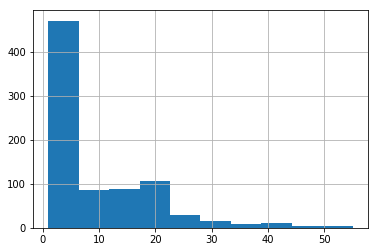

In [17]:
data['num_weeks'].hist();

Note that my dataset is biased towards songs appear very little in the billboards top 100 aka its not a balanced sample rip what can i do about it though

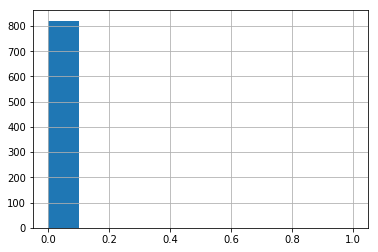

In [12]:
data['genre_old school dancehall'].hist();

In [15]:
Counter(data['genre_old school dancehall'].values) # lol this is ridiculous

Counter({0.0: 821, 1.0: 1})

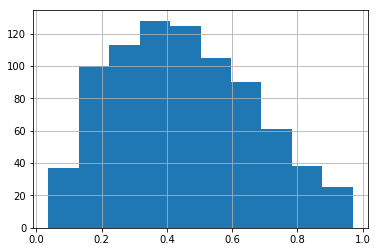

In [16]:
data['valence'].hist();

## Modeling

In [63]:
# processing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # jk this is for classification lmao

# trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

random_state = 42

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('num_weeks', axis=1), data['num_weeks'],
                                                   random_state = random_state)

```python
# saving all the data
pickle.dump(X_train, open('../data/model_data/X_train.pkl', 'wb'))
pickle.dump(X_test, open('../data/model_data/X_test.pkl', 'wb'))
pickle.dump(y_train, open('../data/model_data/y_train.pkl', 'wb'))
pickle.dump(y_test, open('../data/model_data/y_test.pkl', 'wb'))
```

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
X_train.head()

,duration_ms,explicit,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,...,genre_uk pop,genre_underground hip hop,genre_urban contemporary,genre_vapor trap,genre_viral pop,genre_viral trap,genre_vocal jazz,genre_west coast rap,genre_west coast trap,genre_yacht rock
713,208733.0,False,0.1250,0.555,0.662,0.000000,11,0.1110,-4.952,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,236032.0,True,0.1180,0.537,0.518,0.000000,1,0.1460,-5.987,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
630,269600.0,False,0.0285,0.489,0.588,0.000002,1,0.0906,-6.177,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,227533.0,True,0.6270,0.670,0.654,0.000001,4,0.0710,-5.944,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,181812.0,True,0.0113,0.791,0.581,0.000000,11,0.3500,-7.323,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index=X_train.index)
X_train_scaled.head(20)

,duration_ms,explicit,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,...,genre_uk pop,genre_underground hip hop,genre_urban contemporary,genre_vapor trap,genre_viral pop,genre_viral trap,genre_vocal jazz,genre_west coast rap,genre_west coast trap,genre_yacht rock
713,-0.139049,-1.056806,-0.297419,-0.864573,0.219399,-0.137271,1.530316,-0.469854,0.631567,-1.255948,...,-0.183186,-0.183186,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0
181,0.515235,0.946248,-0.329869,-0.989726,-0.653976,-0.137271,-1.198120,-0.164193,0.202822,0.796211,...,-0.183186,-0.183186,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0
630,1.319769,-1.056806,-0.744769,-1.323469,-0.229419,-0.137247,-1.198120,-0.648010,0.124115,0.796211,...,-0.183186,5.458938,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0
648,0.311536,0.946248,2.029730,-0.064981,0.170879,-0.137259,-0.379589,-0.819180,0.220634,0.796211,...,-0.183186,-0.183186,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0
637,-0.784273,0.946248,-0.824504,0.776329,-0.271874,-0.137271,1.530316,1.617371,-0.350612,-1.255948,...,-0.183186,-0.183186,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0
158,0.278557,-1.056806,-0.848424,1.151789,0.753129,10.451152,0.711785,-0.750188,-2.210995,0.796211,...,-0.183186,-0.183186,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0
69,2.667691,0.946248,1.941651,-0.690748,0.862301,-0.137259,1.530316,1.547506,0.412016,0.796211,...,-0.183186,-0.183186,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0
294,1.531377,0.946248,-0.809670,1.200460,-1.139185,-0.137271,0.984629,0.857586,-0.495599,0.796211,...,-0.183186,-0.183186,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0
131,-0.815886,-1.056806,0.017813,1.228272,0.037446,-0.137271,0.166098,-0.838393,1.153518,-1.255948,...,-0.183186,-0.183186,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0
44,0.278629,0.946248,-0.639074,-0.204040,0.668218,-0.137271,0.166098,0.613058,0.263716,-1.255948,...,-0.183186,-0.183186,-0.206263,-0.146829,-0.157982,-0.057073,-0.057073,-0.163299,-0.057073,0.0


In [48]:
# baseline

dummy = DummyRegressor()
dummy.fit(X_train_scaled, y_train)
pred = dummy.predict(X_test_scaled)
dummy.score(X_test_scaled, y_test) # returns the r2 

-0.001454774646169943

In [51]:
lr = LinearRegression()
scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')
print(-scores)

[3.43295162e+24 1.19834561e+25 8.79755366e+26 1.06466655e+22
 9.02988236e+24]


In [53]:
lasso = LassoCV(cv=5, random_state=random_state)
lasso.fit(X_train_scaled, y_train)
lasso.score(X_test_scaled, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

NameError: name 'lass' is not defined

In [54]:
lasso.score(X_test_scaled, y_test) 
# marked improvement than linear regression which suggests that i have lots of erroneous variables

0.016725730860844057

In [56]:
ridge = RidgeCV(cv=5)
ridge.fit(X_train_scaled, y_train)
ridge.score(X_test_scaled, y_test)

-0.6164652151239636

In [57]:
elastic = ElasticNetCV(cv=5, random_state=random_state)
elastic.fit(X_train_scaled, y_train)
elastic.score(X_test_scaled, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.031027887181969804

#### Some trees 

In [60]:
tree = DecisionTreeRegressor(random_state=random_state)
tree.fit(X_train_scaled, y_train)
tree.score(X_test_scaled, y_test)

-0.7071320178591831

In [61]:
rf = RandomForestRegressor(random_state=random_state)
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.11004184144839879

In [67]:
xgb = XGBRegressor(random_state=random_state)
xgb.fit(X_train_scaled, y_train)
xgb.score(pd.DataFrame(X_test_scaled, columns = X_test.columns), y_test) # returns r^2

0.05588473363647406